In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotnine as pn
import seaborn as sns 

import scipy.signal
import scipy.stats

import utils
import torch

from einops import rearrange, reduce, repeat

import sklearn.cluster
# from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler



In [67]:
import importlib
importlib.reload(utils)


<module 'utils' from '/home/acercyc/projects/Keio Testing_analysis/src/utils.py'>

In [45]:
subj = utils.ExpInfo.getSubjIDs()[1]
task = utils.ExpInfo.taskName[0]

In [101]:
def comp_n_actionPlan(subj, task):
    # load data
    df_beh = utils.LoadData.behaviorData(subj, task)
    X, H, Y = utils.LoadData.xhy(subj, task)

    # compute clustering threshold
    H_diff = [utils.DataProcessing.diff(x) for x in H]
    H_diff_ = np.concatenate(H_diff, axis=0)
    dist_threshold = np.quantile(H_diff_, 0.99)

    # segmentation
    seg = [utils.DataProcessing.seqSegmentation(x, dist_threshold, minLen=4) for x in H]

    # count number of segments
    nSeg = [len(x) for x in seg]

    df_beh_ = df_beh.copy()
    df_beh_['nSeg'] = nSeg
    return df_beh_

df_nap = utils.GroupOperation.map(comp_n_actionPlan, utils.ExpInfo.getSubjIDs(), task)



|████████████████████████████████████████| 50/50 [100%] in 16.0s (3.13/s) 


In [102]:
df_nap_ = pd.concat(df_nap, axis=0)

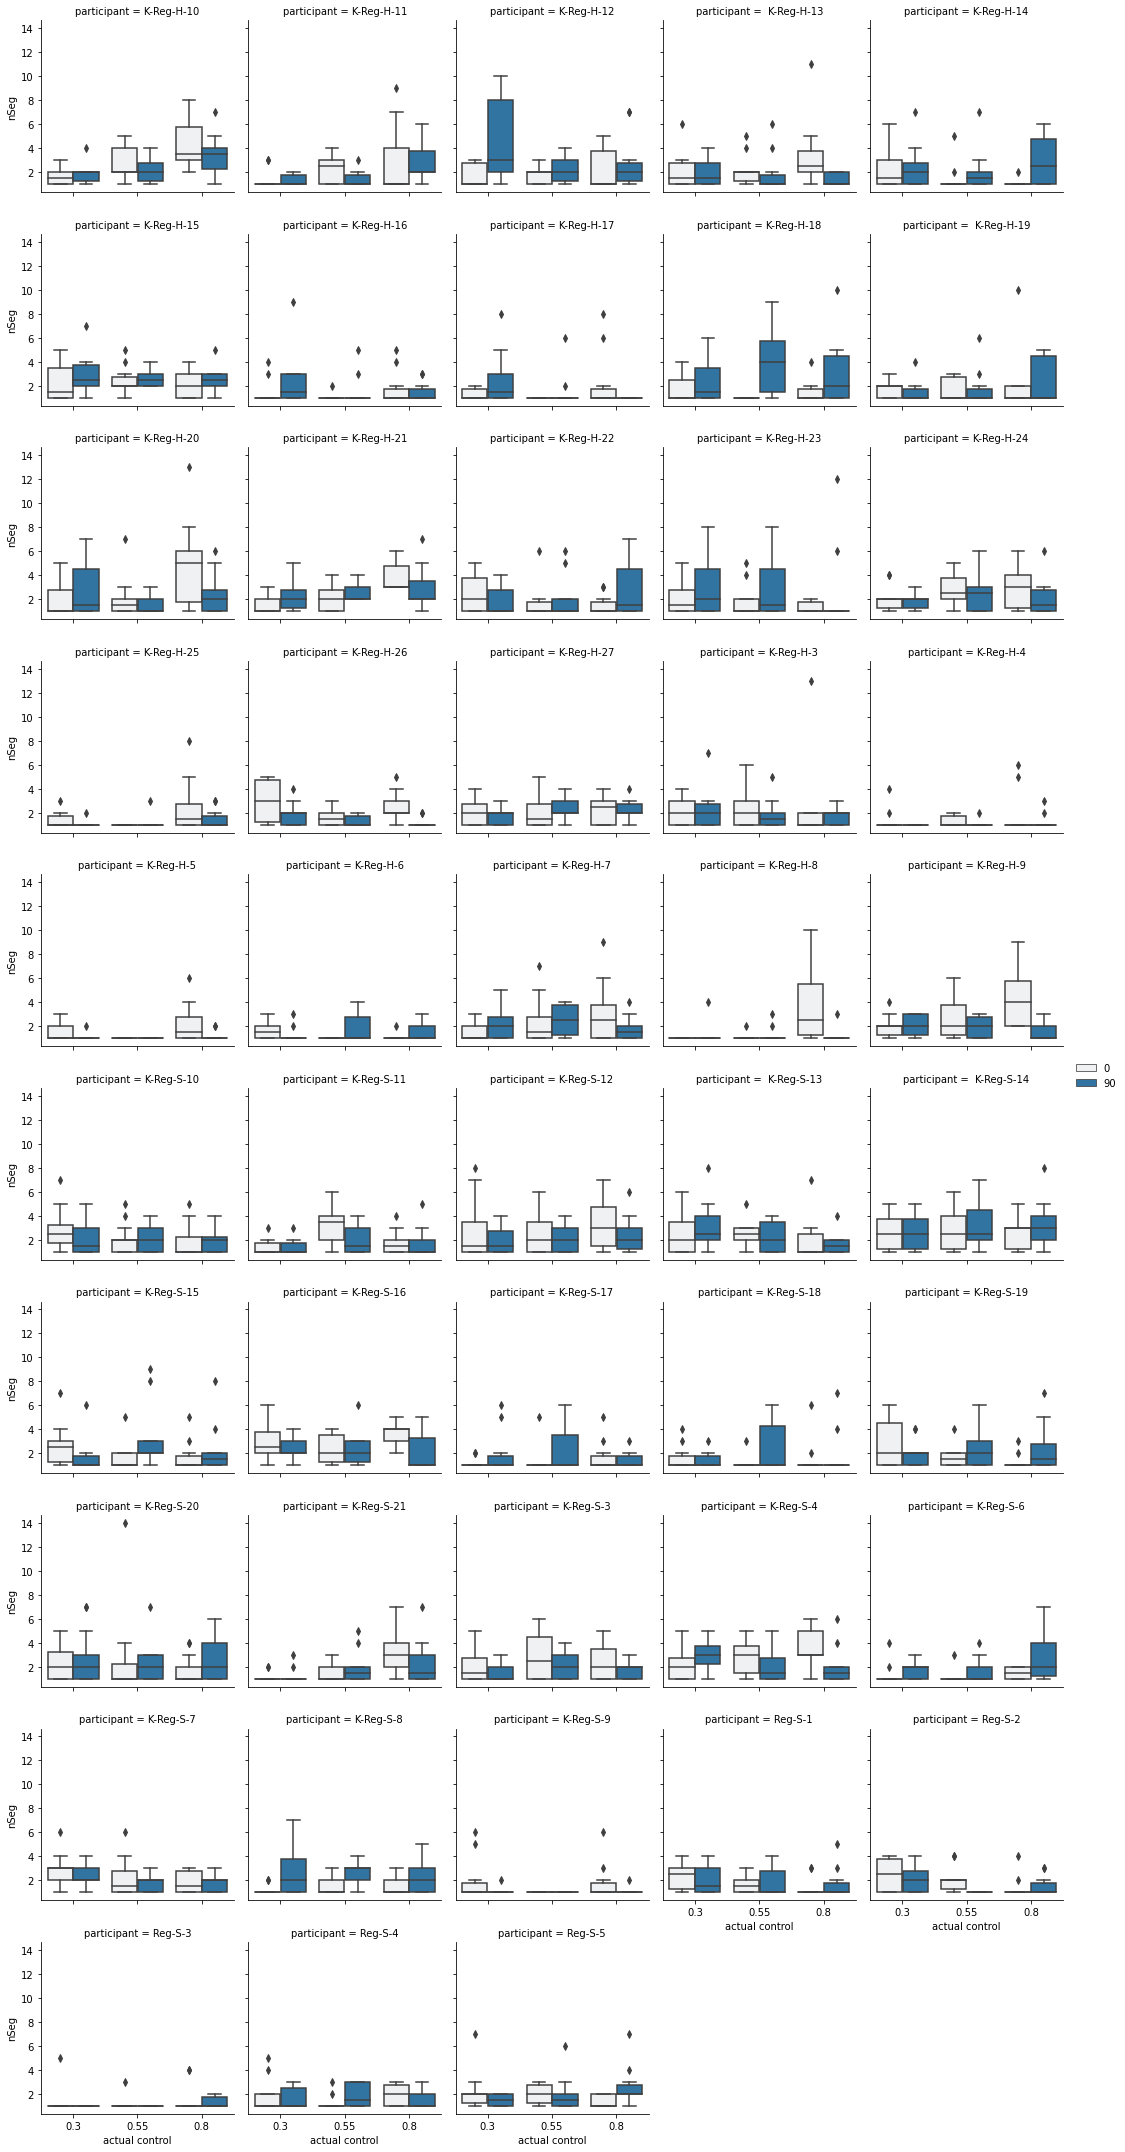

In [103]:
grid = sns.FacetGrid(col='participant', col_wrap=5, data=df_nap_)
grid.map_dataframe(sns.boxplot, 
                   x='actual control', 
                   y='nSeg', 
                   hue='angular bias')
grid.add_legend()

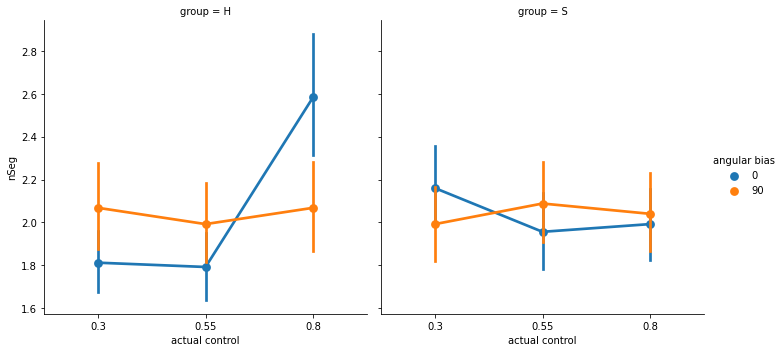

In [104]:
sns.catplot(x='actual control', y='nSeg', hue='angular bias', data=df_nap_, kind='point', col='group')

In [105]:
# # input labels and return index
# def labels2idx(labels, minLen=3):
#     minCount = 3
#     unique, counts = np.unique(labels, return_counts=True)
#     seqInfor = dict(zip(unique, counts))
#     seq = {}
#     for k, v in seqInfor.items():
#         if v >= minLen:
#             seq[k] = np.where(labels == k)[0]
#     return seq


# def seqSegmentation(seq, dist_threshold, minLen=3):
#     from sklearn.cluster import AgglomerativeClustering
#     connectivity = np.diagflat(np.ones(len(seq)-1), 1)
#     labels = AgglomerativeClustering(n_clusters=None,
#                                      distance_threshold=dist_threshold,
#                                      connectivity=connectivity,
#                                      linkage='average').fit_predict(seq)
#     return labels2idx(labels, minLen=minLen)




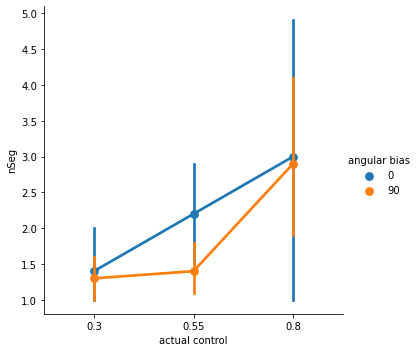

In [106]:

sns.catplot(x='actual control', y='nSeg', hue='angular bias', data=df_beh_, kind="point")

In [107]:
# fig, ax = plt.subplots(1, 1, figsize=(13, 5))
# ax.plot(dist)
# ax.scatter(range(len(dist)), dist, c=labels[1:], cmap='tab20')
# noGroup = np.where(labels==-1)
# noGroup = np.array(noGroup)-1
# ax.scatter(noGroup, dist[noGroup], c='r', marker='x', s=100)

# trialno = 9
# nTime = 60
# df = utils.LoadData.mouseMovement(subj, task, trialno+1)
# d_trial = df[["x-shift", "y-shift"]].values
# d_trial_cum = d_trial.cumsum(axis=0)
# utils.Plot.traj_withCluster(d_trial_cum[:, 0], d_trial_cum[:, 1], labels, align='c')


In [108]:
# h = H[0]
# connectivity = np.diagflat(np.ones(len(h)-1), 1)
# labels = sklearn.cluster.AgglomerativeClustering(n_clusters=None, 
#                                                  distance_threshold=dist_threshold, 
#                                                  connectivity=connectivity, 
#                                                  linkage='average').fit_predict(h)

